# Eigenvalues and Eigenvectors Introduction　
## Agenda
- 固有値と固有ベクトル
- 正方行列の正則行列による対角化

### Hardware

In [1]:
%%bash
system_profiler SPHardwareDataType | grep -E \
"Model Identifier"\|"Processor Name"\|"Processor Speed"\
\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


In [2]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.15.4
BuildVersion:	19E287


### Python

In [3]:
!python -V

Python 3.7.4


### Install packages

In [4]:
pass

### Import

In [5]:
import numpy as np
from functools import reduce
import sympy 
import matplotlib.pyplot as plt

### 関数

In [6]:
pass

## 1. 固有値と固有ベクトル

$$
A = [a_{ij}]
$$

はn次正方行列とする。

- 固有値とは、$A\mathbf x = \lambda \mathbf x, \mathbf x \neq 0$を満たすn次元列ベクトル$\mathbf x$が存在するような$\lambda$のこと
- 固有ベクトルとは、各固有値に対応する$A\mathbf x = \lambda \mathbf x, \mathbf x \neq 0$を満たすn次元列ベクトル$\mathbf x$
- 固有値は、一般には複数あるが、dimA 個以下


### 定義

ゼロでないベクトル $v \in \mathbb C^n$に対して、$Av = \lambda v$となるような複素数$\lambda \in \mathbb C$が存在するとき、$\lambda$をAの固有値、$v$をAの固有ベクトルと呼ぶ。

### REMARKS

- 固有値と固有ベクトルは必ず組になって現れる


### 例題1

$$
A =\left[\begin{array}{ccc}
3 & -5 & -5\\
-1 & 7 & 5\\
1 & -9 & -7
\end{array}\right]
$$
の固有値と固有ベクトル(normは1に揃えよ)を求めよ。

[解答]

Aの固有方程式$\varphi(t)$は

$$
\varphi(t) = |A - tI_n| =\left|\begin{array}{ccc}
3-t & -5 & -5\\
-1 & 7-t & 5\\
1 & -9 & -7-t
\end{array}\right|
$$



In [7]:
t = sympy.Symbol('t')
expr = (3-t)*(7-t)*(-7-t)-70 + 5*(7-t) - 5*(-7-t) + 45 *(3- t)
print('eigenvalues are' , sympy.solve(expr))

eigenvalues are [-2, 2, 3]


対応する固有ベクトルの計算(-2を例とする)は

$$
\left[\begin{array}{ccc}
5 & -5 & -5\\
-1 & 9 & 5\\
1 & -9 & -5
\end{array}\right]\mathbf x = 0
$$


よって、
$$
\begin{aligned}
5x_1 - 5x_2 - 5x_3 &= 0\\
-x_1 + 9x_2 + 5x_3 &= 0
\end{aligned}
$$

Then,
$$
\mathbf x = \frac{1}{\sqrt 6}(1, -1,  2)^T
$$


### 固有方程式の根と係数の関係
$[\lambda_1, ..., \lambda_n]$を$A = [a_{ij}]$の固有値とすると

$$
\begin{aligned}
\Sigma \lambda_i &= tr(A)\\
\Pi \lambda_i & = |A|
\end{aligned}
$$

[証明]

$$
\varphi(t) = |A - t I_n| = (-1)^nt^n + (-1)^{n-1}t^{n-1}tr(A) + ... - \left(\sum_{i=1}^n \text{det } A_{i, i}\right)t + \text{det }A
$$

一方、Aの固有値は固有方程式の解なので

$$
\varphi(t) = (-1)^n(t - \lambda_1)...(t - \lambda_n)
$$

よって係数比較より自明。

### 正則条件

<img src = 'https://github.com/RyoNakagami/omorikaizuka/blob/master/algorithm/固有値正則条件.jpg?raw=true'>

### Pythonで確認

In [8]:
def eigenvalue_check(A):
    w, v = np.linalg.eig(A)
    res_1 = np.allclose(sum(w),np.trace(A))
    res_2 = np.allclose(reduce(lambda a, b: a*b, w), np.linalg.det(A))
    print(' trace check :', res_1, '\n','determinant check: ', res_2)

In [9]:
A = np.array([[9,10],[-6,-7]])
eigenvalue_check(A)

 trace check : True 
 determinant check:  True


In [10]:
A = np.array([[11,9],[-4,-1]])
eigenvalue_check(A)

 trace check : True 
 determinant check:  True


In [11]:
A = np.array([[5,-7, -7],[-4, 8, 7], [4, -10, -9]])
eigenvalue_check(A)

 trace check : True 
 determinant check:  True


In [12]:
A = np.random.randint(10, 100, 9).reshape(3,3)
eigenvalue_check(A)

 trace check : True 
 determinant check:  True


### 転置行列と固有多項式

$$
|A - \lambda I_n| = |(A - \lambda I_n)^T| = |A^T - \lambda I_n|
$$

より、転置行列の固有多項式は一致する。


## 2. Diagonalization(対角化)

n次正方行列Aに対して、正則行列Pを適当に選んで、$D = P^{-1}AP$とすると、$D$はAの対角化行列となる。

### 対角化条件

n次正方行列Aが対角化可能な必要十分条件は、Aがn個の線形独立な固有ベクトルを有することである

#### Example

2次正方行列Aに対して,$\{v, u\}\in \mathbf C^2$という固有ベクトルが与えられているとする. このとき、

$$
P = (v, u)
$$
とすると、

$$
P^{-1}AP = \Lambda = \left(\begin{array}{cc}\lambda_v & 0\\ 0 & \lambda_u \end{array}\right)
$$


### Pythonで実行

In [13]:
### ３次正方行列の設定
A = np.array([[0.2,0.7, 0.1],[0.4,0.5, 0.1], [0.2, 0.6, 0.2]]).T
print(A)

[[0.2 0.4 0.2]
 [0.7 0.5 0.6]
 [0.1 0.1 0.2]]


In [14]:
### 固有値固有ベクトルの計算
w, v = np.linalg.eig(A)
print(w,'\n\n', v)

[ 1.  -0.2  0.1] 

 [[-4.74054679e-01 -7.07106781e-01 -5.34522484e-01]
 [-8.64452649e-01  7.07106781e-01 -2.67261242e-01]
 [-1.67313416e-01  2.67621717e-17  8.01783726e-01]]


In [15]:
### 対角化
D = np.linalg.inv(v)@A@v
D_1 = np.where(abs(D) > 1e-15, D, 0)
D_1

array([[ 1. ,  0. ,  0. ],
       [ 0. , -0.2,  0. ],
       [ 0. ,  0. ,  0.1]])

固有ベクトルの順番を変えてみると

In [16]:
D = np.linalg.inv(v[:,::-1])@A@v[:,::-1]
D_2 = np.where(abs(D) > 1e-15, D, 0)
D_2

array([[ 0.1,  0. ,  0. ],
       [ 0. , -0.2,  0. ],
       [ 0. ,  0. ,  1. ]])

なお行列のn乗は一致する

In [17]:
test_1 = v@np.linalg.matrix_power(D_1, 10000)@np.linalg.inv(v)
test_2 = v[:,::-1]@np.linalg.matrix_power(D_2, 10000)@np.linalg.inv(v[:,::-1])
np.allclose(test_1,test_2)

True

### 行列の冪乗と固有値

$$
A^k = (PDP^{-1})^k = PD^kP^{-1}
$$
との関係が知られている。


[証明]
$$
A^k = (PDP^{-1})^k = (PDP^{-1})(PDP^{-1})...(PDP^{-1})
$$

このとき、$PP^{-1} = I_n$より

$$
A^k = PD^kP^{-1}
$$



In [18]:
prob_raw = np.linalg.matrix_power(A, 10000)
prob_raw

array([[0.31481481, 0.31481481, 0.31481481],
       [0.57407407, 0.57407407, 0.57407407],
       [0.11111111, 0.11111111, 0.11111111]])

In [19]:
prob = v@np.linalg.matrix_power(D, 10000)@np.linalg.inv(v)
prob

array([[ 0.07407407,  0.07407407, -0.59259259],
       [ 0.03703704,  0.03703704, -0.2962963 ],
       [-0.11111111, -0.11111111,  0.88888889]])

### Example

2次正方行列Aに対して固有ベクトルが$\{u, v\} \in \mathbf C^2$で与えられたとする。任意のベクトル$w\in \mathbf C^2$は$\{u, v\}$の線形結合で表されるので、

$$
\begin{aligned}
Aw &= A(au + bv)\\
& = a\lambda_u u + b \lambda_v v
\end{aligned}
$$

同様にして冪乗も

$$
A^kw = \lambda_u^k au + \lambda_v^k b v
$$

と計算できる。


### 遷移確率行列と固有値

n次の正方行列$A = [a_{ij}]$において、$a_{ij}>0, \sum_{j=1}^n a_{ij} = 1$であるとき、Aの固有値の1つは１。

#### 証明

$$
A\left[\begin{array}{c}1\\1\\\vdots\\ 1\end{array}\right] =  \left[\begin{array}{c}1\\1\\\vdots\\ 1\end{array}\right] 
$$

より明らか。

#### Example : 冪乗の計算

Aを２次の正方行列$A = [a_{ij}]$において、$a_{ij}>0, \sum_{j=1}^n a_{ij} = 1$であるとする。
$B = A^k$としたとき、$\lim_{k\to \infty} B$と計算したいとする。このとき、


$$
A = \left(\begin{array}{cc}1-a & a\\ b & 1-b\end{array}\right)
$$
とすると、固有値は$1, 1-a-b$となる。これに対応する固有ベクトルを計算すると、$(1, 1)^T$と$(a, -b)^T$となる。

よって、

$$
A^m = P\left(\begin{array}{cc} 1 & 0\\0 & 1-a-b\end{array}\right)^m P^{-1}
$$

よって、

$$
\lim_{k\to \infty}B = \left(\begin{array}{cc} 1 & a\\1 & -b\end{array}\right)\left(\begin{array}{cc} 1 & 0\\0 & 0\end{array}\right)\frac{-1}{a+b}\left(\begin{array}{cc} -b & -a\\-1 & 1\end{array}\right) = \frac{1}{a+b}\left(\begin{array}{cc} b & b\\a & a\end{array}\right)
$$



### Page遷移確率への応用

$A = [a_{ij}]$をjからiへのページ遷移の確率を表す行列とする.この遷移行列の収束先はAの固有値のうち、1の値をとる固有値に対応する固有ベクトルの絶対値表現を正規化したものと一致する。

steady stateの条件より

$$
Av = v
$$

が成立するため(vはsteady stateベクトル)。


In [20]:
### 遷移行列の定義
A = np.array([[0.2,0.7, 0.1],[0.4,0.5, 0.1], [0.2, 0.6, 0.2]]).T
print(A)

[[0.2 0.4 0.2]
 [0.7 0.5 0.6]
 [0.1 0.1 0.2]]


In [21]:
init = np.random.randint(1, 10, 3)
init = init/init.sum()
init

array([0.09090909, 0.81818182, 0.09090909])

In [22]:
### 10000乗の計算
np.linalg.matrix_power(A, 10000) @ init

array([0.31481481, 0.57407407, 0.11111111])

In [23]:
### 固有値, 固有ベクトルの計算
w, v = np.linalg.eig(A)
idx = np.argmin(abs(w - 1.0))
v_adj = -1*v[:, idx]

In [24]:
### 収束ベクトルと固有ベクトルが一致することを確認
v_adj/sum(v_adj)

array([0.31481481, 0.57407407, 0.11111111])

#### REMARKS

- 固有値1に対応する固有ベクトルを正規化したものと一致するので、ベクトル要素の合計値が１になるように調整する必要がある。

### 連立差分方程式

二つの数列$\{x_n\}, \{y_n\}$の間に

$$
\begin{cases}
x_n &= 7 x_{n-1} + 3 y_{n-1}\\
y_n & = x_{n-1} + 5 y_{n-1}
\end{cases}
$$

ただし、$(x_0, y_0) = (3, -2)$としたとき、

In [25]:
A = np.array([[7, 3],[1, 5]], dtype = float)
w, v = np.linalg.eig(A)
D = np.linalg.inv(v)@A@v
np.where(abs(D) > 1e-15, D, 0)

array([[8., 0.],
       [0., 4.]])

よって

$$
A^k = P\left(\begin{array}{cc}8 & 0\\ 0 & 4\end{array}\right)^kP^{-1}
$$

In [26]:
def calculate_transition(tran_mat, power, init):
    w, v = np.linalg.eig(tran_mat)
    D = np.linalg.inv(v)@tran_mat@v
    D = np.where(abs(D) > 1e-15, D, 0)
    return np.array(v@D**(power-1)@np.linalg.inv(v)@init, dtype = int)

In [27]:
calculate_transition(tran_mat = A, power = 2, init = np.array([3, -2]))

array([15, -6])

### 漸化式

$$
x_{n+2} - 4 x_{n+1} - 5 x_n = 0
$$

$(x_1, x_0) = (7, -1)$と与えられたとき、$x_{n+1} = y_n$と変形すると

$$
\begin{aligned}
x_{n} &=  y_{n-1}\\
y_{n} &= 4 y_{n-1} + 5 x_{n-1}
\end{aligned}
$$



In [28]:
A =  np.array([[0, 1],[5, 4]], dtype = float)
calculate_transition(tran_mat = A, power = 2, init = np.array([-1, 7]))

array([ 7, 23])

### Example: ジョギング人口

ある年、急にジョギングが流行しだした。そこで、ジョギング人口の推移を毎年一回調べることにしたところ、いつも前の年にジョギングをやっていた人の４割が脱落、やっていなかった人のうち２割がジョギングを始めることがわかった。

n年後のジョギング人口、非ジョギング人口をそれぞれ$x_n, y_n$としたとき、

$$
\begin{aligned}
\left(\begin{array}{c}x_n\\ y_n\end{array}\right) = \left(\begin{array}{cc}0.6 & 0.2\\ 0.4 & 0.8\end{array}\right)\left(\begin{array}{c}x_{n-1}\\ y_{n-1}\end{array}\right)\
\end{aligned}
$$


In [29]:
prob = np.array([[0.6, 0.2],[0.4, 0.8]])
w, v = np.linalg.eig(prob)
idx = np.argmin(abs(w - 1))

In [30]:
v[:,idx]

array([-0.4472136 , -0.89442719])

Then, nを十分大きくとったときのジョギング人口比は

In [31]:
v[:,idx]/v[0, idx]

array([1., 2.])

と計算できる。

## Appendix: 行列式のIntuition

正方行列Aに対して、行列式 `det A` は行列　Aのある一面の特性を表すスカラー量にすぎず、決して行列そのものではない。

### 行列式の定義

正方行列 $A = [a_{ij}]$を考える。このとき、

$$
\text{det} A = \sum_{\rho \in S_n}\text{sgn}( \rho) a_{\rho(1)1}a_{\rho(2)2}...a_{\rho(n)n}
$$

- $S_n$: n文字の置換全体の集合を表す



### 行列式のIntuition

<img src = 'https://github.com/RyoNakagami/omorikaizuka/blob/master/math101/行列_面積拡大率.jpg?raw=true'>


Aは2次正方行列とする。１辺の長さが1の正方形に行列Aを作用させると、一般には、少しひしゃげた平行四辺形に変更される。このときのAの行列式は、Aをかけたときの面積の拡大率である。ただし、図形が裏返ったときは、行列式は負になる。

### Example 1

$$
B = \left(\begin{array}{cc}
3 & 0\\
0 & 2
\end{array}\right)
$$

を作用させたときは

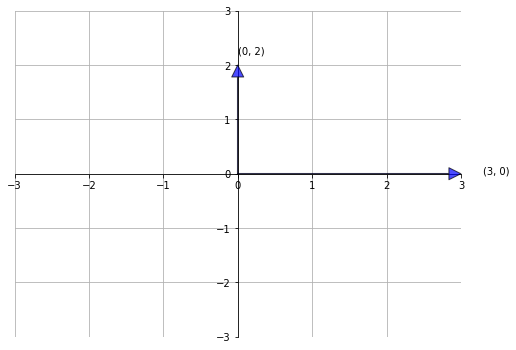

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-3, 3), ylim=(-3, 3))
ax.grid()
vecs = ((3, 0), (0, 2))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))

In [33]:
B = np.array([[3, 0],
              [0, 2]])
np.linalg.det(B)

6.0

このとき、図形は横に３倍、縦に２倍されるので面積は６倍になる。

### Example 2

$$
C = \left(\begin{array}{cc}
-1 & 0\\
0 & 1
\end{array}\right)
$$

を作用させたときは

In [34]:
C = np.array([[-1, 0],
              [0, 1]])
np.linalg.det(C)

-1.0

### Example 3

$$
P = \left(\begin{array}{cc}
\cos \theta & -\sin \theta\\
-\sin \theta & \cos \theta
\end{array}\right)
$$

という回転行列を作用させたときは、図形は回転するだけなので$det P = 1$.

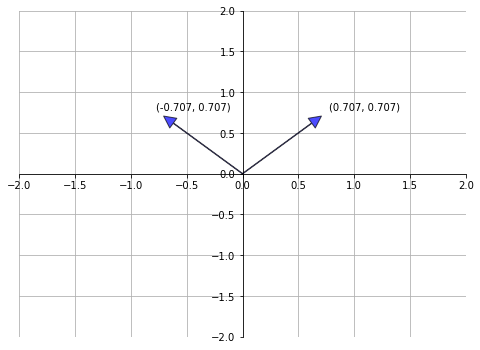

In [35]:
theta = np.pi/4

fig, ax = plt.subplots(figsize=(8, 6))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
vecs = ((np.cos(theta), np.sin(theta)), (-np.sin(theta), np.cos(theta)))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    w = (v[0].round(3), v[1].round(3))
    ax.text(1.1 * v[0], 1.1 * v[1], str(w))

### 行列式の性質：線形性と交代性

#### 交代性

$$
\text{det} (\mathbf b, \mathbf a) = - \text{det} (\mathbf a, \mathbf b)
$$

平行四辺形の２辺を入れ替えると図形が裏返る、従って、行列式は-1倍になる。

このことから

$$
\text{det} (\mathbf a, \mathbf a) = - \text{det} (\mathbf a, \mathbf a)
$$

つまり、$\text{det} (\mathbf a, \mathbf a) = 0$がわかる。


#### 線形性

関数$f(v, t)$は次のような性質を持つとき変数tについて線形性を持つという

$$
\begin{aligned}
f(v, t_1 + t_2) &= f(v, t_1) + f(v, t_2)\\
f(v, ct) &= cf(v,t)
\end{aligned}
$$


### 行列式と多重線形性

$\text{det} (\mathbf a_1, \mathbf a_2)$は$\mathbf a_1, \mathbf a_2$のつくる平行四辺形の面積に符号をつけたものなので、多重線形性を満たす。

$$
\begin{aligned}
\text{det} (\mathbf a_1 + \mathbf a_1', \mathbf a_2) &= \text{det} (\mathbf a_1, \mathbf a_2) + \text{det}(\mathbf a_1', \mathbf a_2) \\
\text{det}(c  \mathbf a_1, \mathbf a_2) & = c \ \ \text{det}(\mathbf a_1, \mathbf a_2)
\end{aligned}
$$
